In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Global Warming Dataset

In [2]:
# https://www.kaggle.com/datasets/sevgisarac/temperature-change
global_warming_df = pd.read_csv('data/FAOSTAT_data_1-10-2022.csv')
global_warming_df.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1961,1961,?C,0.746,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1962,1962,?C,0.009,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1963,1963,?C,2.695,Fc,Calculated data
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1964,1964,?C,-5.277,Fc,Calculated data
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,7001,January,1965,1965,?C,1.827,Fc,Calculated data


### Coffee Production in Tons Dataset

In [98]:
# https://www.kaggle.com/code/firefortysix/geospatial-viz-of-global-coffee-production-in-2020/data
coffee_production = pd.read_csv('data/coffee-production-by-exporting-countries-1991-2020-ico.csv', 
                                encoding = "ISO-8859-1",
                                skip_blank_lines=True)
coffee_production.drop(columns='Type',inplace=True)
coffee_production.head()

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Brazil,1637137.716,1637609.604,2076201.252,1690018.716,1691522.82,1083612.132,1751804.58,1568880.24,2205651.198,...,3325704.612,2915509.734,3325080.072,3281337.984,3198286.014,3172235.256,3407290.704,3164389.074,3907847.982,3492642.762
1,Viet Nam,78617.280,86270.880,140426.820,181212.960,217896.54,238205.160,345148.86,418736.52,423103.320,...,1199999.994,1589976.666,1404126.342,1656586.884,1634431.314,1865402.514,1669150.572,2005949.940,1816984.488,1829229.864
2,Colombia,863760.000,1078823.820,896812.680,685345.320,777840.00,776281.080,646731.00,727349.76,652077.720,...,511359.564,459200.016,595616.670,727444.212,800000.610,840526.884,878063.358,829444.350,831957.720,846007.092
3,Indonesia,446482.980,509591.760,334168.680,404597.280,322072.68,274405.740,493235.04,457246.68,437757.300,...,547710.708,413335.398,784202.316,774056.958,656776.638,755128.506,692461.596,651138.918,577055.652,685976.550
4,Ethiopia,174567.060,175479.840,109510.260,178020.240,165763.80,189919.320,204446.52,183411.84,175663.500,...,333623.088,339024.594,367920.396,374546.634,382995.708,390898.524,428578.776,440803.992,450673.404,440605.974


### Retail Prices Dataset

In [4]:
# https://www.ico.org/new_historical.asp?section=Statistics
retail_prices = pd.read_excel('data/3b - retail_prices.xlsx')

In [5]:
# cleaning column names by snakecasing and strpping blankspace
retail_prices.columns = [col.lower().strip().replace(' ','_') 
                         for col in retail_prices.columns]
# shortening usa name
retail_prices.rename(columns={'united_states_of_america':'usa'},inplace=True)

In [6]:
# Will avoid imputing missing data until necessary
retail_prices.head()

,year,austria,belgium,bulgaria,cyprus,czechia,denmark,finland,france,germany,...,slovakia,slovenia,spain,sweden,japan,norway,russian_federation,switzerland,united_kingdom_1,usa
0,1990,4.90,3.27,NaN,2.83,NaN,3.81,2.98,3.73,3.99,...,NaN,NaN,3.62,3.43,10.26,3.31,NaN,4.83,10.55,2.97
1,1991,4.57,2.92,NaN,2.80,NaN,3.67,2.72,3.43,3.84,...,NaN,NaN,3.50,3.29,11.88,3.16,NaN,4.36,10.41,2.81
2,1992,4.99,3.05,NaN,2.87,NaN,3.79,2.46,2.31,4.00,...,NaN,NaN,3.50,3.11,12.62,3.12,NaN,4.52,10.09,2.58
3,1993,4.97,2.78,NaN,2.60,NaN,3.48,1.94,2.03,3.62,...,NaN,NaN,2.79,2.65,14.57,2.46,NaN,4.27,8.44,2.47
4,1994,4.58,3.42,NaN,3.18,NaN,4.45,2.73,2.40,4.18,...,NaN,NaN,2.76,3.79,14.69,3.29,NaN,4.50,11.36,3.40


## Colombia
- [] climate and changes
    - [x] temperature
    - [] precipitation
    - [] humidity
- [x] coffee production
- [] coffee price
- [] people employed in coffee growing industry
- [] consumption habits / demand
    - [] how much coffee people are drinking (retail prices)

## Colombia Temperature Changes

In [7]:
# Assigning Colombia as its own DataFrame
colombia_temp_change = global_warming_df[global_warming_df.Area=='Colombia']

In [8]:
# cleaning columns
colombia_temp_change.columns = [col.lower().strip().replace(' ','_') 
 for col in colombia_temp_change.columns]

In [9]:
# grabbing only meterological year as months for easy plotting/visualization
colombia_yearly_temp_change = colombia_temp_change[colombia_temp_change['months']=='Meteorological year'].sort_values(by=['months','year'],ascending=False)

In [10]:
colombia_yearly_temp_change.head()

,domain_code,domain,area_code_(fao),area,element_code,element,months_code,months,year_code,year,unit,value,flag,flag_description
48891,ET,Temperature change,44,Colombia,7271,Temperature change,7020,Meteorological year,2020,2020,?C,1.391,Fc,Calculated data
48890,ET,Temperature change,44,Colombia,7271,Temperature change,7020,Meteorological year,2019,2019,?C,1.228,Fc,Calculated data
48889,ET,Temperature change,44,Colombia,7271,Temperature change,7020,Meteorological year,2018,2018,?C,0.972,Fc,Calculated data
48888,ET,Temperature change,44,Colombia,7271,Temperature change,7020,Meteorological year,2017,2017,?C,0.625,Fc,Calculated data
48887,ET,Temperature change,44,Colombia,7271,Temperature change,7020,Meteorological year,2016,2016,?C,0.941,Fc,Calculated data


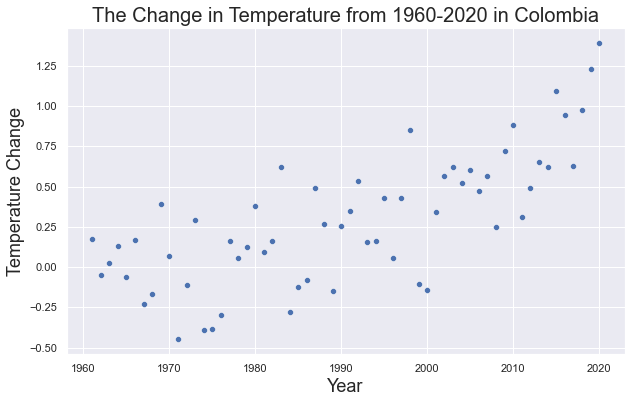

In [15]:
ax = sns.scatterplot(x=colombia_yearly_temp_change.year,
                     y=colombia_yearly_temp_change.value);

sns.set(rc={'figure.figsize':(10,6)})

ax.set_title('The Change in Temperature from 1960-2020 in Colombia',fontsize=20)
ax.set_xlabel('Year',fontsize=18)
ax.set_ylabel('Temperature Change',fontsize=18);

### Quick Interpretation:
- There is a clear increase in temperature that is especially prevelant since 2000

## Colombia Production

In [53]:
# reading in and cleaning production dataset
production = pd.read_csv('data/colombia_production.csv')
production.columns=[col.lower().strip().replace(' ','_').replace('/','_') 
                    for col in production.columns]

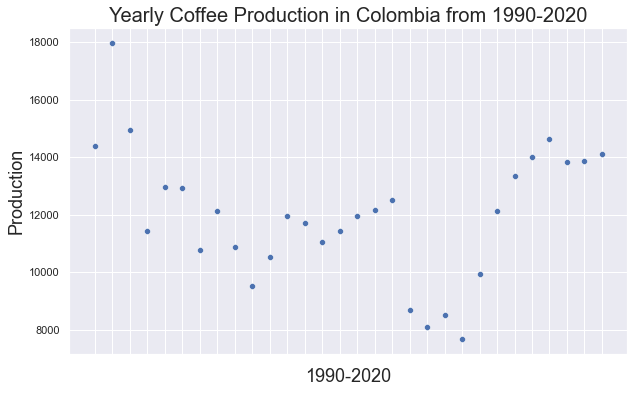

In [70]:
ax = sns.scatterplot(x=production.crop_year,
                     y=production.colombia);

sns.set(rc={'figure.figsize':(10,6)});

ax.set_xticklabels([]);

ax.set_title('Yearly Coffee Production in Colombia from 1990-2020',fontsize=20)
ax.set_xlabel('1990-2020',fontsize=18)
ax.set_ylabel('Production',fontsize=18);

## Colombia Demand
https://www.nationmaster.com/nmx/sector/coffee#trade

In [77]:
colombia_demand= pd.read_excel('data/Colombia_data/Coffee Demand in Colombia.xlsx')

In [78]:
colombia_demand

,Date,Thousand Metric Tons
0,2018,-12
1,2017,20
2,2016,24
3,2015,82
4,2014,76


## Colombia Consumption

In [81]:
coffee_consumption=pd.read_excel('data/Colombia_data/Coffee Consumption in Colombia.xlsx')

In [99]:
coffee_consumption.head()

,Date,Thousand Units (Bags of 60 kg)
0,2019,1831.146
1,2018,1791.410
2,2017,1793.271
3,2016,1736.441
4,2015,1720.373
